# ATU - Programming and Scripting Project 2023

##### analysis.py
### Author: Norbert Antal

## Summary of the Iris dataset

The Iris flower data set, also known as Fisher’s Iris data set, is a multivariate data set that was introduced by British statistician and biologist Ronald Fisher. <br>The data was collected by Edgar Anderson to quantify the morphologic variation of Iris flowers of three related species and was utilised by Fisher to demonstrate the use of linear discriminant analysis in his 1936 paper titled “The use of multiple measurements in taxonomic problems” published in the Annals of Eugenics.
<br>Today the dataset is widely used as a typical test case for statistical classification in machine learning. 
The Iris dataset contains 50 samples of three Iris flower species: Iris setosa, Iris virginica, and Iris versicolor. Each sample has four features measured in centimetres: sepal and petal length and width. Using these four variables, Ronald Fisher developed a linear discriminant model to differentiate between the species.*(Ref: Wikipedia 2023, (https://en.wikipedia.org/wiki/Iris_flower_data_set)*

Importing relevant libraries<br>
+ numpy - is a library for adding support for large, multi-dimensional arrays along with a large collection of high-level mathematical functions to operate on these arrays (ref: https://en.wikipedia.org/wiki/NumPy)
+ pandas - for data manipulation and analysis (ref: https://en.wikipedia.org/wiki/Pandas_(software))
+ matplotlib - for creating graphical representation of data (ref: https://en.wikipedia.org/wiki/Matplotlib)
+ seaborn - same as above with extended finctionality and styling options (ref: https://en.wikipedia.org/wiki/Matplotlib)

In [1]:
import numpy as np # for mathematical functions
import pandas as pd # for creating and manipulating dataframe
import matplotlib.pyplot as plt # for creating graphical representation of data
import seaborn as sns # # for creating prettier graphical representation of data

## Reading in Iris dataset and add headers

#### Datasource:
iris.data and iris.names files downloaded from https://archive.ics.uci.edu/ml/datasets/iris in a comma-separated value file format

#### Loading data
Data will be analised using Pandas which is a popular data analysis library in Python that provides user friendly data structures and data analysis tools. A Pandas DataFrame is a two-dimensional table with labeled columns and rows, similar to a spreadsheet. (ref: https://towardsdatascience.com/a-python-pandas-introduction-to-excel-users-1696d65604f6)
<br>

+ Read in iris dataset from filename stored in 'SOURCEDATA'
+ adding headers manually from downloaded iris.names source file
+ combine with pandas to create a dataframe storedf as 'df'

In [2]:
SOURCEDATA="iris.data" # store filename
# create headers taking header names manually from "iris.names" source file
headers=[
    "sepal length (cm)", 
    "sepal width (cm)", 
    "petal length (cm)", 
    "petal width (cm)",
    "species"]
# combine the two into a dataframe using pandas read_csv function and store the dataframe in 'df' //read_csv ref: (https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html)
df=pd.read_csv(SOURCEDATA, names=headers)

## Project task 1. Output a summary of each variable to a single text file
<br>
Pandas DataFrame describe() method returns a description of the data in the DataFrame. The description -if the data is numeric- contains the following information: 
+ count - The number of not-empty values.
+ mean - The average (mean) value.
+ std - The standard deviation.
+ min - the minimum value.
+ 25% - The 25% percentile*.
+ 50% - The 50% percentile*.
+ 75% - The 75% percentile*.
+ max - the maximum value.
<br>(ref: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.describe.html)
<br>(ref: https://www.w3schools.com/python/pandas/ref_df_describe.asp#:~:text=The%20describe()%20method%20returns,std%20%2D%20The%20standard%20deviation)

In [3]:
df.describe() #ref: (https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.describe.html)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


### Output summary to a text file.
+ Store df.describe() output in 'summary'. 
+ Create and store in 'output' a formatted text output by concatenating a title and data stored in 'summary'
+ Create (or overwrite contents) of summary.txt text file using a **with** statement 
+ Write contents of 'output' into summary.txt. - the file then closes as part of the **with** statement. The **with** statement itself ensures proper acquisition and release of resources. (ref: https://www.geeksforgeeks.org/with-statement-in-python/)

In [4]:
summary=df.describe()
output=(f"THE SUMMARY OF EACH VARIABLE IN THE IRIS DATASHEET\n\n {summary}")
with open('summary.txt','w') as f:
    #f.write("THE SUMMARY OF EACH VARIABLE IN THE IRIS DATASHEET\n",df.describe().to_string())
    f.write(output)

## Project task 2. Create histogram of each variable and save results in png files

+ Created a function 'fn_pnghist(column)' to plot a histogram for each variable (the measurements of the sepal and petal dimensions) 
+ The 'column' argument stores the data frame column header label for the different variables for the histogram.
+ Creating a function instead of making individual plots, allows for setting a custom style only once and having a uniform style for each histogram (ref: https://matplotlib.org/stable/tutorials/introductory/customizing.html)
+ save the histogram of each variable to png files using **savefig** method (ref: https://chartio.com/resources/tutorials/how-to-save-a-plot-to-a-file-using-matplotlib/)
+ set histogram title to equal header label so data in each histogram can be identified

In [22]:
# create a function to draw up histograms with column data as variable and set custom style
# ref: https://www.geeksforgeeks.org/how-to-set-plot-background-color-in-matplotlib/
# ref: https://matplotlib.org/stable/tutorials/introductory/customizing.html
# adding save to .png file feature to the previous function to save the histograms with column data as variable and column name as file name
def fn_pnghist(column):
    plt.style.use('fast')
    plt.grid(True, color="#F3E4C0", linestyle="dotted")
    df[column].hist(bins=10, color="#5D3FD3") #Iris is a vivid shade of violet-tinged blue with the hex code #5D3FD3 (ref: google.com)
    plt.suptitle(f"Histogram of {column}")
    plt.savefig(f"{column}.png") # save plot ref: https://chartio.com/resources/tutorials/how-to-save-a-plot-to-a-file-using-matplotlib/
    plt.show() # turns out plt.show() must be left in the end of the function to avoide having all histograms on one plot 💁


Batch plotting and saving all individual histograms in one go by creating a **for** loop to cycle through the relevant data frame columns in *iris data* and call the 'fn_histpng(column)' function to draw a histogram with each variable as per their column label.<br>
As 'headers' was already established to store data frame column header labels in a list, it was reused for the **for** loop.
The last item of the list was sliced out from the loop in order to exclude 'species' which is the last column header label and is not a flower measurement.

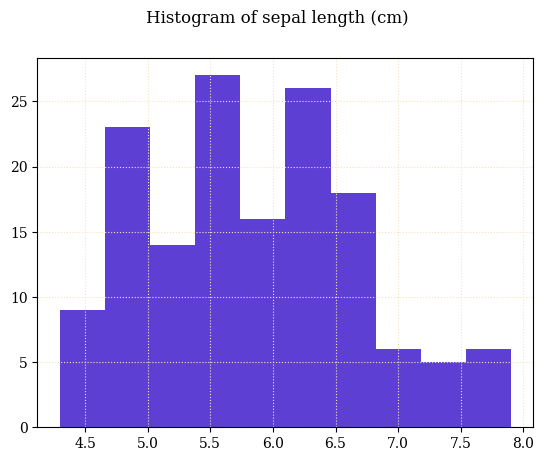

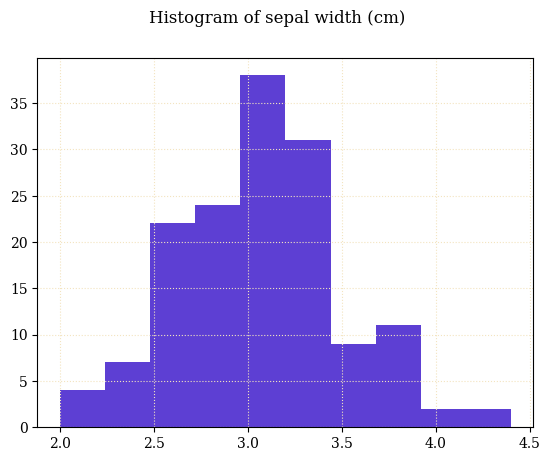

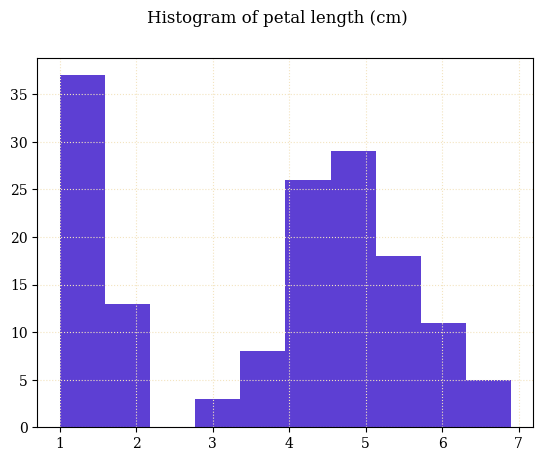

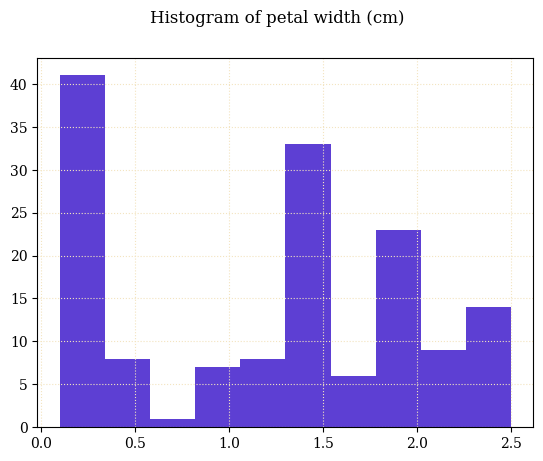

In [26]:
for h in headers[:-1]: # to avoid including 'species' column which is not a measurement, the last item is excluded.
    fn_pnghist(h)

Create a scatter plot of each pair of variables and output the result into one .png file

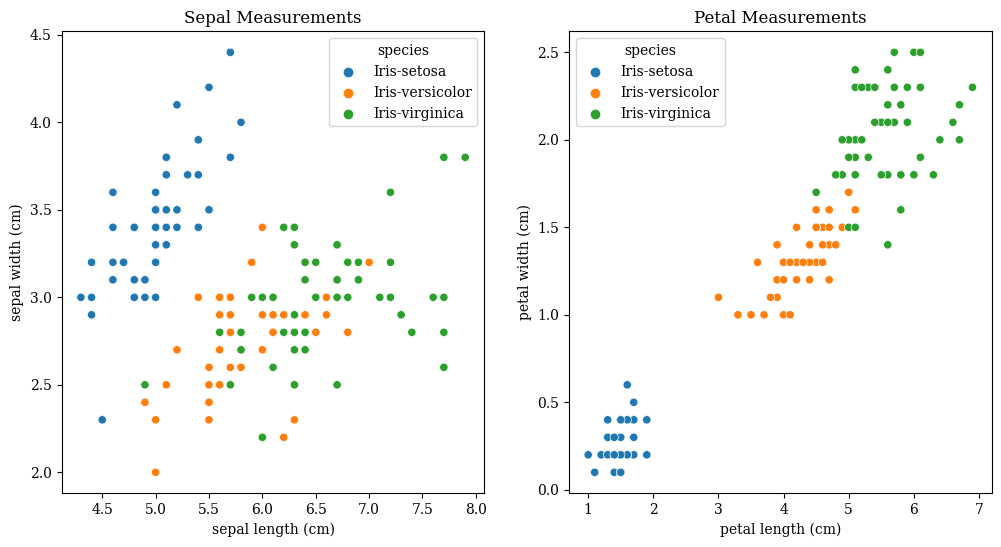

In [9]:
#-----Set plot style 
plt.style.use('fast') #ref: https://matplotlib.org/stable/gallery/style_sheets/index.html
plt.rc("font", family="serif")# default text style ref: customise default style ref: https://stackoverflow.com/questions/3899980/how-to-change-the-font-size-on-a-matplotlib-plot

#-----two plots side by side ref: https://realpython.com/python-matplotlib-guide/#subplots, ref: https://stackoverflow.com/questions/42818361/how-to-make-two-plots-side-by-side
fig, axes = plt.subplots(ncols=2, figsize=(12, 6)) #create a plot object with 2 subplots (specified in 'ncols') and set plotsize 12x6

#-----1. draw scatter plot for sepal variables which are the first two headers stored in 'ax_x' and 'ax_y'
ax_x = headers[0] #"sepal width (cm)"
ax_y = headers[1] #"sepal length (cm)"
sns.scatterplot(data=df, x=ax_x, y=ax_y, hue='species', ax=axes[0])
#-----labels and title for above
axes[0].set_xlabel(ax_x)
axes[0].set_ylabel(ax_y)
axes[0].set_title("Sepal Measurements")
#-----2. draw scatter plot for petal variables which are the next two headers stored in 'ax_x' and 'ax_y'
ax_x = headers[2] #"petal width (cm)"
ax_y = headers[3] #"petal length (cm)"
sns.scatterplot(data=df, x=ax_x, y=ax_y, hue='species', ax=axes[1])
#-----labels and title for above
axes[1].set_xlabel(ax_x)
axes[1].set_ylabel(ax_y)
axes[1].set_title("Petal Measurements")

#------output to -png
plt.savefig(f"scatters.png")
plt.show()

It's quite clear from the two scatter plots that the best way to visualise the differences between the three Iris species is the scatterplot of the Petal measurements. 

Another way to summarise and visualise the relationships within the data is to run a Seaborn Pairplot. <br>This creates a nice visualisation summarising a large amount of data in a single figure. This is essential when we are exploring our dataset and trying to become familiar with it. ref: https://towardsdatascience.com/seaborn-pairplot-enhance-your-data-understanding-with-a-single-plot-bf2f44524b22#:~:text=The%20Seaborn%20Pairplot%20allows%20us,to%20become%20familiar%20with%20it.


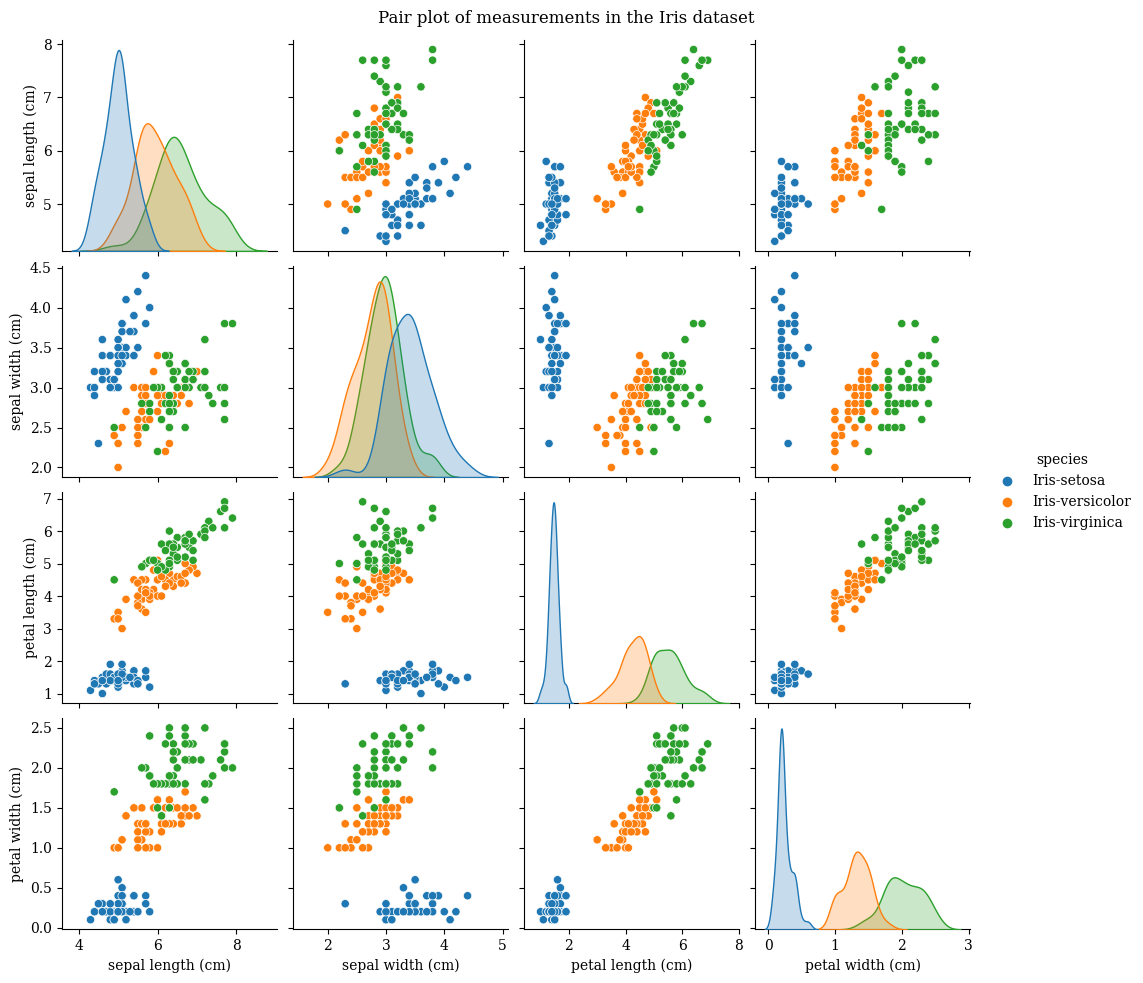

In [10]:
sns.pairplot(df, hue="species")
plt.suptitle("Pair plot of measurements in the Iris dataset") # set title
plt.subplots_adjust(top=0.95) # reducing size of the plot to make more room for the title.
#------output to -png
plt.savefig(f"pairplot.png")
plt.show()

Once again the visualisation of the Iris data shows that the best way to tell apart the different Iris species is to look at the petal measurements. Iris-setosa petal measurements are completely isolate from versicolor and virginica while the latter overlaps

### A proposed practical use:

If we were to identify species in future samples without counting chromosomes we can use the min and max measurements of petal dimensions for each species;

<AxesSubplot:xlabel='petal width (cm)', ylabel='species'>

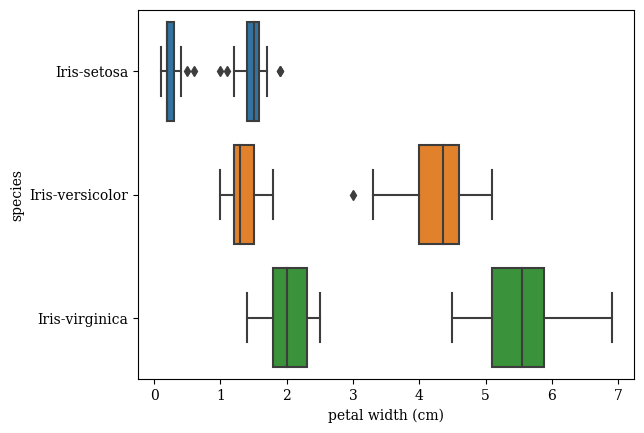

In [11]:
#fig, axes = plt.subplots(ncols=2, figsize=(10, 3)) #create a plot object with 2 subplots (specified in 'ncols') and set plotsize 12x6

w = headers[3] #"petal width (cm)"
l = headers[2] #"petal length (cm)"
sns.boxplot(data=df,x=l, y='species')
sns.boxplot(data=df,x=w, y='species')


In [12]:
irises=['Iris-setosa','Iris-versicolor','Iris-virginica']
for i in irises:
    #print(i)
    print(i,'\n',df.loc[df['species']==i][headers[2:4]].describe().loc[['min','max']]) 
    # pandas tutorial to filter data ref: https://www.youtube.com/watch?v=vmEHCJofslg&t=111s
    # limit describe output ref: https://stackoverflow.com/questions/19124148/modify-output-from-python-pandas-describe, 



Iris-setosa 
      petal length (cm)  petal width (cm)
min                1.0               0.1
max                1.9               0.6
Iris-versicolor 
      petal length (cm)  petal width (cm)
min                3.0               1.0
max                5.1               1.8
Iris-virginica 
      petal length (cm)  petal width (cm)
min                4.5               1.4
max                6.9               2.5


Based on above data, a sample is most likely
Iris-setosa with max petal lenght at 1.9cm and max petal with at 0.6cm
Iris-versicolor with petal lenght between 3.0-4.5cm and petal width between 1.0-1.4cm
Iris-virginica with petal lenght between 5.1-6.9cm and petal width between 1.8-2.5cm

Unfortunately there will be a mixed bag of Iris-versicolor and Iris-virginica with petal lenghts between 4.5-5.1cm and petal width between 1.4-1.8cm, these will require a chromosome count to identify the sepcies.

ValueError: Could not interpret value `sepal_length` for parameter `x`

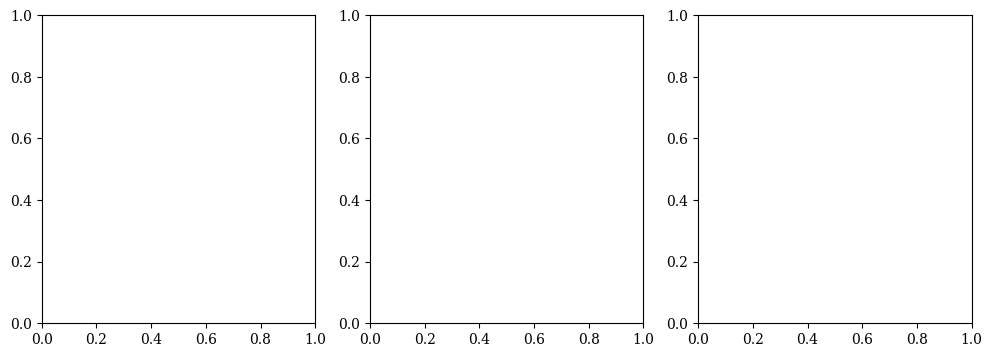

In [13]:
# Create a figure with three subplots
fig, axs = plt.subplots(ncols=3, figsize=(12, 4))

# Create a histogram for each Iris species in a different subplot
sns.histplot(data=df[df.species=='setosa'], x='sepal_length', ax=axs[0], color='blue', alpha=0.5)
sns.histplot(data=df[df.species=='versicolor'], x='sepal_length', ax=axs[1], color='orange', alpha=0.5)
sns.histplot(data=df[df.species=='virginica'], x='sepal_length', ax=axs[2], color='green', alpha=0.5)

# Set the titles of the subplots
axs[0].set_title('Setosa')
axs[1].set_title('Versicolor')
axs[2].set_title('Virginica')

# Show the plot
plt.show()